<a class="anchor" id="0"></a>
# [AI-ML-DS : Training for beginners](https://www.kaggle.com/vbmokin/ai-ml-ds-training-for-beginners-in-kaggle). Level 4 (very difficult). 2021
## Kaggle GM, Prof. [@vbmokin](https://www.kaggle.com/vbmokin)
### [Vinnytsia National Technical University](https://vntu.edu.ua/), Ukraine
#### [Chair of the System Analysis and Information Technologies](http://mmss.vntu.edu.ua/index.php/ua/)

## Dataset [MNIST models testing: handwritten digits](https://www.kaggle.com/vbmokin/mnist-models-testing-handwritten-digits)


Your upvote for my dataset are most welcome.

### Acknowledgements:
* dataset [MNIST Original](https://www.kaggle.com/avnishnish/mnist-original)
* [CNN over MNIST](https://www.kaggle.com/mosius/cnn-over-mnist)
* [MNIST model testing : typographic digits](https://www.kaggle.com/vbmokin/mnist-model-testing-typographic-digits)
* [Data Science for tabular data: Advanced Techniques](https://www.kaggle.com/vbmokin/data-science-for-tabular-data-advanced-techniques)
* [Data Science with DL & NLP: Advanced Techniques](https://www.kaggle.com/vbmokin/data-science-with-dl-nlp-advanced-techniques)
* [AI-ML-DS Training. L3AT: NH4 - NN models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l3at-nh4-nn-models)
* [Introduction to CNN Keras - 0.997 (top 6%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
* [Tensorflow/Keras/GPU for Chinese MNIST Prediction](https://www.kaggle.com/gpreda/tensorflow-keras-gpu-for-chinese-mnist-prediction)

<a class="anchor" id="0.1"></a>
## Table of Contents

1. [Import libraries](#1)
1. [MNIST-digits model training](#2)
    - [Download data](#2.1)
    - [EDA & FE](#2.2)
    - [Model training](#2.3)
    - [Prediction](#2.4)    
    - [Results visualization: plotting the loss error, confusing matrix, outliers](#2.5)
1. [User-digits prediction and analyze](#3)
    - [Download data](#3.1)
    - [Preprocessing](#3.2)
    - [EDA & FE](#3.3)
    - [Prediction](#3.4) 
    - [Results visualization: confusing matrix, outliers](#3.5)

## 1. Import libraries<a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.io import loadmat
from keras.utils import to_categorical
import itertools

import warnings
warnings.simplefilter('ignore')

## 2. MNIST-digits model training<a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

### 2.1. Download data<a class="anchor" id="2.1"></a>

[Back to Table of Contents](#0.1)

In [2]:
# Thanks to https://www.kaggle.com/mosius/cnn-over-mnist
def load_mnist_dataset():
    """
    Load MNIST-original dataset

    Returns:
    - mnist_data -- an array of arrays in the shape of (784,)
    - mnist_label -- an array of labels
    - classes -- array of labels classes(a set of labels)
    - shape -- shape of data item
    - channels_count -- channel count of data images
    """

    mnist = loadmat("../input/mnist-original/mnist-original.mat")
    mnist_data = mnist["data"].T
    mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
    mnist_label = mnist["label"][0]
    count = len(set(mnist_label))
    return mnist_data, mnist_label, count, (28, 28, 1)

In [3]:
# Download data from MNIST-original dataset
data, labels, classes_count, data_shape = load_mnist_dataset()

print("data shape: " + str(data.shape))
print("labels shape: " + str(labels.shape))
print("classes count: " + str(classes_count))

data shape: (70000, 28, 28, 1)
labels shape: (70000,)
classes count: 10


### 2.2. EDA & FE<a class="anchor" id="2.2"></a>

[Back to Table of Contents](#0.1)

In [4]:
def plot_images_sample(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

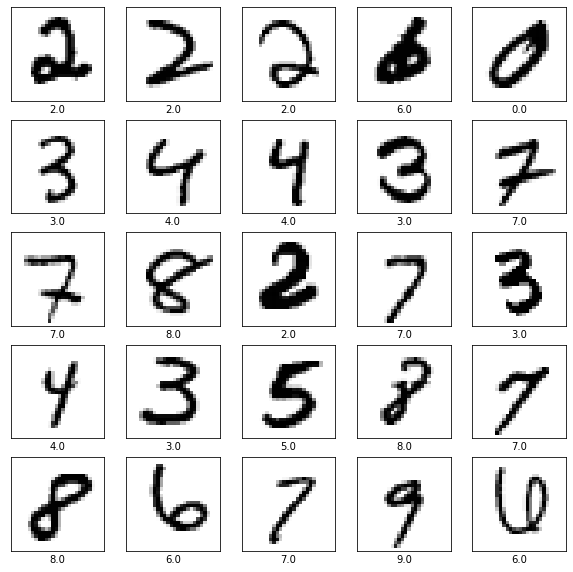

In [5]:
# Draw plot for images sample
plot_images_sample(data, labels)

In [6]:
def fe_data(df, target):
    # FE: scaling data ant transform target to categorical
    df = df / 255.
    target = to_categorical(target)
    return df, target

**TASK**: Experiment with test_size_part

In [7]:
# FE and data splitting
test_size_part = 0.1
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(data, labels, test_size=test_size_part, shuffle=True)
X_train, Y_train = fe_data(x_train_orig, y_train_orig)
X_test, Y_test = fe_data(x_test_orig, y_test_orig)

### 2.3. Model training<a class="anchor" id="2.3"></a>

[Back to Table of Contents](#0.1)

**TASKS**: Experiment with CNN architecture and parameters:
* number of layers
* Conv2D parameters in each layers: number of neurons, kernel_size, strides, padding, activation functions
* MaxPooling2D parameters
* Dropout (add or no)
* Softmax (add or no)
* etc.

In [8]:
# Thanks to https://www.kaggle.com/mosius/cnn-over-mnist
# Model building
model = models.Sequential([
        layers.Conv2D(8, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='relu', input_shape=data_shape),
        layers.MaxPooling2D((8, 8), padding='same'),
        layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
        layers.MaxPooling2D((4, 4), padding='same'),
        layers.Flatten(),
        layers.Dense(classes_count)
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 16)          528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 834
Trainable params: 834
Non-trainable params: 0
__________________________________________________________

**TASK**: Experiment with:
* epochs_num
* validation_split_part (optional)

In [9]:
# Model training
epochs_num = 10
validation_split_part = 0.2
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=epochs_num, validation_split=validation_split_part)

Epoch 1/10
1575/1575 [==============================] - 16s 10ms/step - loss: 1.6159 - accuracy: 0.4604 - val_loss: 0.5062 - val_accuracy: 0.8486
Epoch 2/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.4443 - accuracy: 0.8681 - val_loss: 0.3436 - val_accuracy: 0.8967
Epoch 3/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.3132 - accuracy: 0.9069 - val_loss: 0.2802 - val_accuracy: 0.9133
Epoch 4/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.2493 - accuracy: 0.9243 - val_loss: 0.2339 - val_accuracy: 0.9278
Epoch 5/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.2231 - accuracy: 0.9316 - val_loss: 0.2146 - val_accuracy: 0.9325
Epoch 6/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.2055 - accuracy: 0.9371 - val_loss: 0.2264 - val_accuracy: 0.9268
Epoch 7/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.1940 - accuracy: 0.9405 - val_loss: 0.2113 - val_a

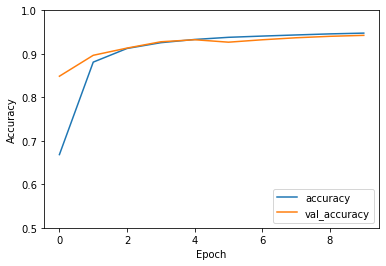

In [10]:
# Draw plot for CNN training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [11]:
# Print test prediction accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("test accuracy: " + str(test_acc))

219/219 - 1s - loss: 0.1743 - accuracy: 0.9456
test accuracy: 0.9455714225769043


### 2.4. Prediction<a class="anchor" id="2.4"></a>

[Back to Table of Contents](#0.1)

In [12]:
def get_predictions(X_test):
    # Digits prediction

    predictions = model.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

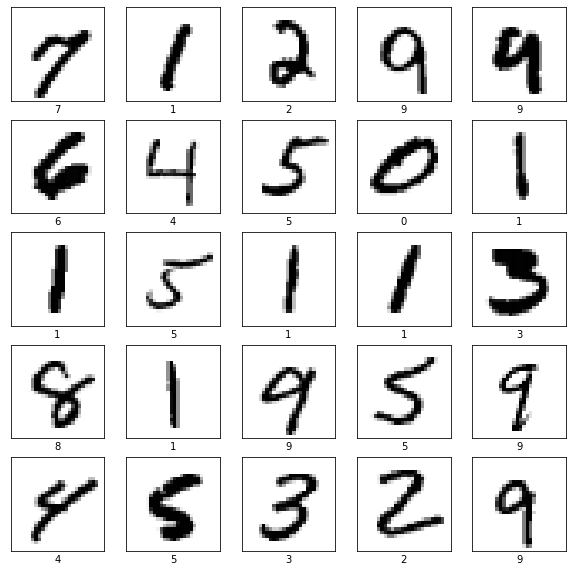

In [13]:
# Prediction and display it
predictions = get_predictions(X_test)
plot_images_sample(X_test, predictions)

### 2.5. Results visualization: plotting the loss error, confusing matrix, outliers<a class="anchor" id="2.5"></a>

[Back to Table of Contents](#0.1)

### Plotting the loss error (Plotly)

In [14]:
# Thanks to https://www.kaggle.com/vbmokin/tensorflow-keras-gpu-for-chinese-mnist-prediction
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')

In [15]:
# Plotting the loss error (Plotly)
plot_accuracy_and_loss(history)

### Confuse matrix

In [16]:
def plot_cm(train, target_train):
# Look at confusion matrix 
# Thanks to https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Predict the values from the validation dataset
    Y_pred = model.predict(train)
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(target_train,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = range(10)) 

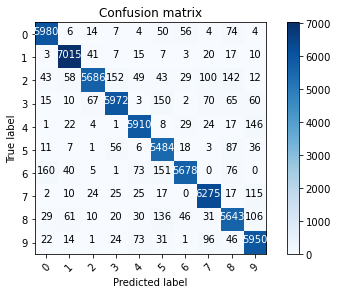

In [17]:
# Draw confusing matrix for training data
plot_cm(X_train, Y_train)

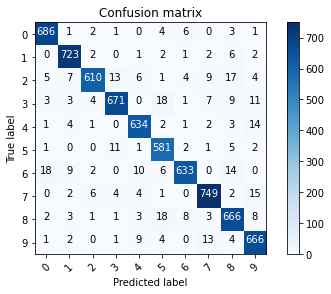

In [18]:
# Draw confusing matrix for test data
plot_cm(X_test, Y_test)

### Outliers analysis

In [19]:
def pred_wrong_display_MNIST_dataset(X_test, predictions, Y_test):
    # Displays misclassified digits from MNIST dataset
    
    X_test_wrong = []
    predictions_wrong = []
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.argmax(Y_test[i]))
        if predictions[i] != Y_test_pred[i]:
            #print(i, predictions[i], Y_test_pred[i])
            X_test_wrong.append(X_test[i])
            predictions_wrong.append(predictions[i])

    plot_images_sample(X_test_wrong, predictions_wrong)
        
    print('Accuracy is', round(accuracy_score(Y_test_pred, predictions),3))
    
    return Y_test_pred

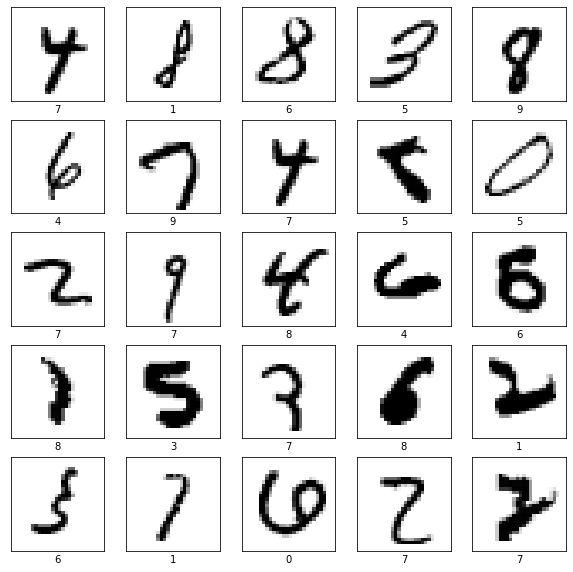

Accuracy is 0.946


In [20]:
# Displays misclassified digits from MNIST
Y_test_pred = pred_wrong_display_MNIST_dataset(X_test, predictions, Y_test)

## 3. User-digits prediction and analyze<a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

### 3.1. Download data<a class="anchor" id="3.1"></a>

[Back to Table of Contents](#0.1)

In [21]:
# Find all images in input folder
data_files = []
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        data_files.append(os.path.join(dirname, filename))
data_files

['../input/mnist-models-testing-handwritten-digits/scan_smoothing_6.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_4.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_2.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_5.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_3.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_1.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_0.png',
 '../input/mnist-models-testing-handwritten-digits/black_marker.jpg',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_7.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_9.png',
 '../input/mnist-models-testing-handwritten-digits/scan_smoothing_8.png',
 '../input/mnist-original/mnist-original.mat']

**TASK**: Experiment with different images - see in dataset [MNIST models testing: handwritten digits](https://www.kaggle.com/vbmokin/mnist-models-testing-handwritten-digits)

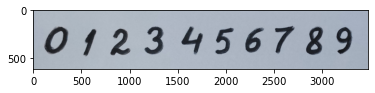

In [22]:
# Download data
image_file = data_files[7]
image_test = cv2.imread(image_file)
plt.imshow(image_test)
plt.show()

### 3.2. Preprocessing<a class="anchor" id="3.2"></a>

[Back to Table of Contents](#0.1)

**TASKS**: Experiment with parameters:
* erode_kernel
* threshold_basic

In [23]:
def digits_finder(image_file: str, erode_kernel=48, threshold_basic=100, out_size=28):
    # Find digits on the image_file and transform it to [-1, out_size, out_size, 1]
    
    image_test = cv2.imread(image_file)
    gray_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_test, threshold_basic, 255, cv2.THRESH_BINARY)
    image_erode = cv2.erode(thresh, np.ones((erode_kernel, erode_kernel), np.uint8), iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(image_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    output = image_erode.copy()

    digits = []
    j = 0
    labels = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        #if (hierarchy[0][idx][3] == 0):
        if (hierarchy[0][idx][3] == 0) and (w*h>3000):
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            digit_crop = image_erode[y:y + h, x:x + w]

            # Resize digit canvas to square
            size_max = max(w, h)
            print(j, w*h)
            digit_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                y_pos = size_max//2 - h//2
                digit_square[y_pos:y_pos + h, 0:w] = digit_crop
            elif w < h:
                x_pos = size_max//2 - w//2
                digit_square[0:h, x_pos:x_pos + w] = digit_crop
            else:
                digit_square = digit_crop
            
            # Resize digit to 28x28 and add digit and its X-coordinate
            digits.append((x,(cv2.resize(digit_square, (out_size, out_size), interpolation=cv2.INTER_AREA))))
            labels.append(str(j))
            j += 1
            

    # Sort array in place by X-coordinate
    digits.sort(key=lambda x: x[0], reverse=False)
    
    # Tranform digits to tensor
    digits_new =[]
    for i in range(len(digits)):
        digits_new.append(digits[i][1])
    digits_res = np.reshape(digits_new, (j, 28, 28, 1))
    digits_res = np.where(digits_res > 225, 255, digits_res)
    digits_res = np.where(digits_res < 125, 0, digits_res)

    return digits_res, labels

In [24]:
# Preprocessing data
X_user_test, Y_user_test = digits_finder(image_file, erode_kernel=3, threshold_basic=100)

0 37260
1 58380
2 51600
3 53075
4 46978
5 52268
6 71786
7 57024
8 65700
9 59616


### 3.3. EDA & FE<a class="anchor" id="3.3"></a>

[Back to Table of Contents](#0.1)

In [25]:
def plot_images_test(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    plt.gray()
    for i in range(len(Y)):        
        plt.subplot(1,len(Y),i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(X[i]))
        plt.xlabel(Y[i])
    plt.show()

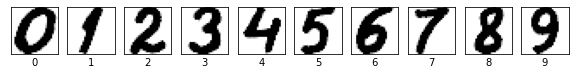

In [26]:
# Draw plot for images sample
plot_images_test(X_user_test, Y_user_test)

In [27]:
# FE
X_user_test, Y_user_test = fe_data(X_user_test, Y_user_test)

### 3.4. Prediction<a class="anchor" id="3.4"></a>

[Back to Table of Contents](#0.1)

In [28]:
# Color inversion 
X_user_test = 1-X_user_test

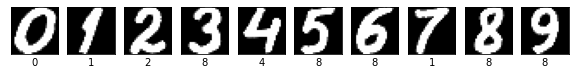

In [29]:
# Prediction and display it
predictions_user = get_predictions(X_user_test)
plot_images_test(X_user_test, predictions_user)

### 3.5. Results visualization: confusing matrix, outliers<a class="anchor" id="3.5"></a>

[Back to Table of Contents](#0.1)

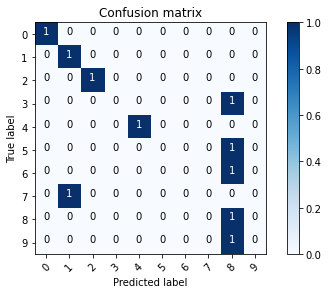

In [30]:
plot_cm(X_user_test, Y_user_test)

In [31]:
def pred_wrong_display_for_user_dataset(X_test, predictions, Y_test):
    # Displays misclassified digits from user's dataset
    
    X_test_wrong = []
    predictions_wrong = []
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.argmax(Y_test[i]))
        if predictions[i] != Y_test_pred[i]:
            #print(i, predictions[i], Y_test_pred[i])
            X_test_wrong.append(X_test[i])
            predictions_wrong.append(predictions[i])

    plot_images_test(X_test_wrong, predictions_wrong)
        
    print('Accuracy is', round(accuracy_score(Y_test_pred, predictions),3))
    
    return Y_test_pred

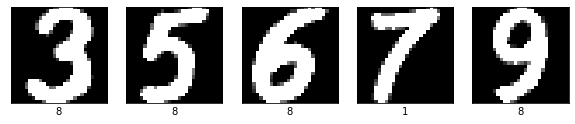

Accuracy is 0.5


In [32]:
Y_user_test_pred = pred_wrong_display_for_user_dataset(X_user_test, predictions_user, Y_user_test)

### Tensor values output

MNIST

In [33]:
X_train[100][6]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

User's dataset

In [34]:
X_user_test[0][6]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.12941176],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.28627451],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.17647059],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.21960784],
       [0.        ]])

In [35]:
X_user_test[1][6]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.23921569],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [36]:
X_user_test[9][6]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.47058824],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.50980392],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.20784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

I hope you find this notebook useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)